**Name: Mohammed Varaliya**

**Roll No: T109**

## Import necessary libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn import datasets

## Load Breast Cancer Dataset

In [48]:
data = datasets.load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

## Split the dataset into training and testing sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [50]:
logreg_model = LogisticRegression(max_iter=3000)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.956140350877193


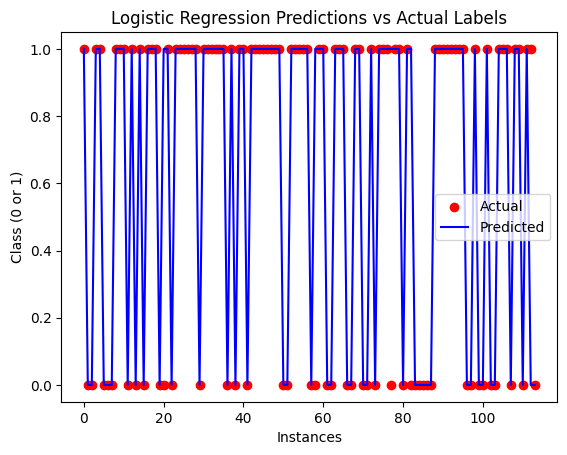

In [51]:
# Generate scatter points for the test data
plt.scatter(np.arange(len(y_test)), y_test, color='red', label='Actual')

# Generate predictions using the logistic regression model
logistic_predictions = logreg_model.predict(X_test)

# Plot the prediction line
plt.plot(np.arange(len(y_test)), logistic_predictions, color='blue', label='Predicted')

# Add labels and title
plt.title('Logistic Regression Predictions vs Actual Labels')
plt.xlabel('Instances')
plt.ylabel('Class (0 or 1)')
plt.legend()
plt.show()

**Name: Mohammed Varaliya**

**Roll No: T109**

## Evaluate Logistic Regression

In [52]:
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, logreg_pred)}")
print(f"Precision: {precision_score(y_test, logreg_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, logreg_pred, average='weighted')}")
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

Logistic Regression Metrics:
Accuracy: 0.956140350877193
Precision: 0.9569049312470365
Recall: 0.956140350877193
[[39  4]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Decision Tree

In [53]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.9298245614035088


In [54]:
# Calculate confusion matrices
cm_logistic = confusion_matrix(y_test, logreg_pred)
cm_tree = confusion_matrix(y_test, dt_pred)

# Print confusion matrices
print("Logistic Regression Confusion Matrix:")
print(cm_logistic)
print("\nDecision Tree Classifier Confusion Matrix:")
print(cm_tree)

Logistic Regression Confusion Matrix:
[[39  4]
 [ 1 70]]

Decision Tree Classifier Confusion Matrix:
[[39  4]
 [ 4 67]]


**Name: Mohammed Varaliya**

**Roll No: T109**

## Evaluate Decision Tree

In [55]:
print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, dt_pred)}")
print(f"Precision: {precision_score(y_test, dt_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, dt_pred, average='weighted')}")
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Metrics:
Accuracy: 0.9298245614035088
Precision: 0.9298245614035088
Recall: 0.9298245614035088
[[39  4]
 [ 4 67]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



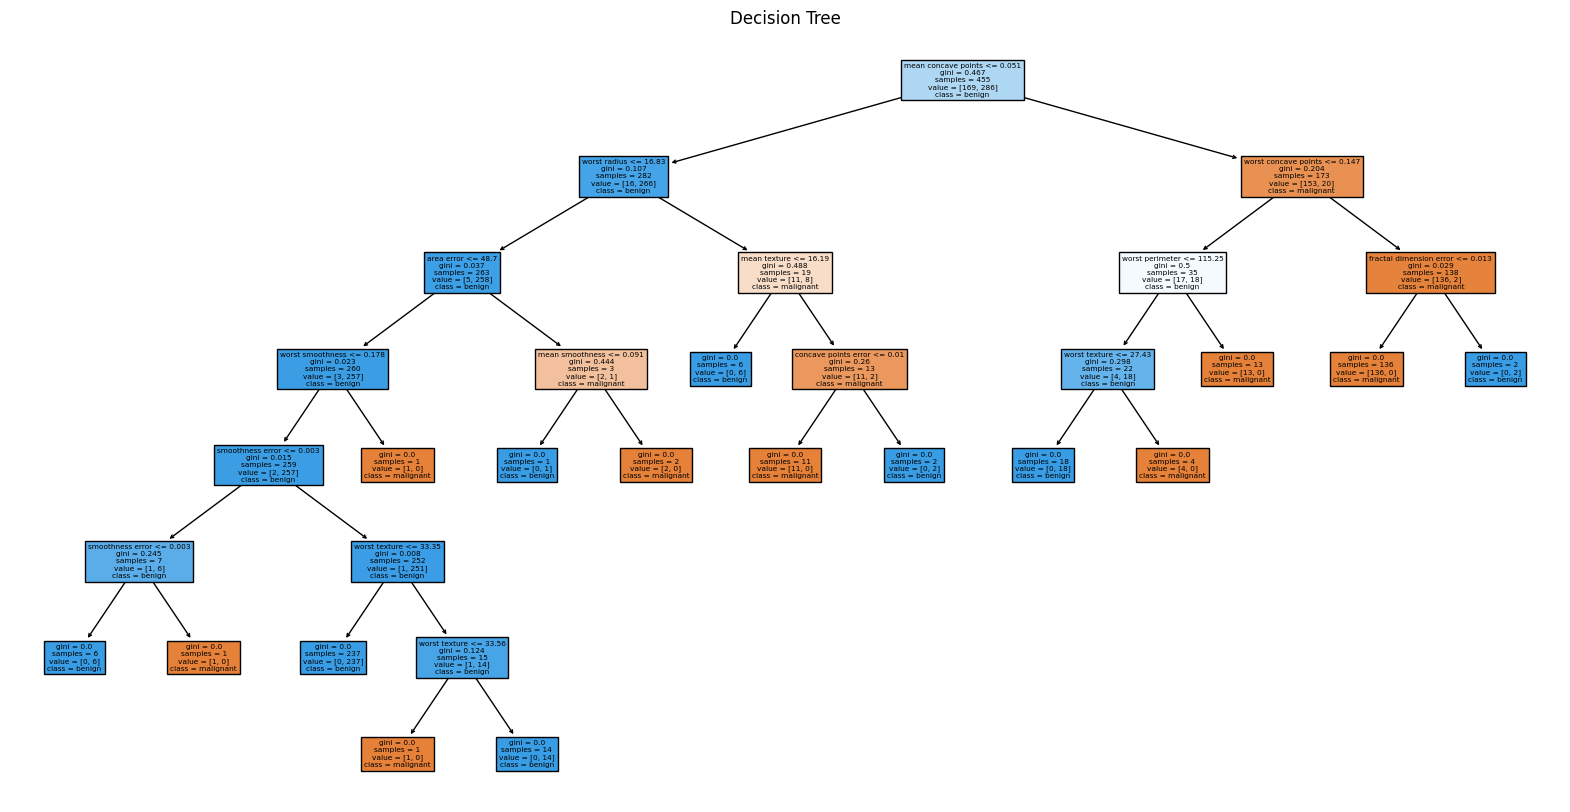

In [56]:
# Plotting the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree")
plt.show()